<a href="https://colab.research.google.com/github/Sowmya74/Hamoye_Intern/blob/main/DataScience_Stage_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hamoye Stage C**

## **Machine Learning: Classification - Managing the Quality Metric of Global Ecological Footprint**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Tele_churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### **PreProcessing**

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0).astype(float)

In [8]:
print(df['Churn'].unique())

['No' 'Yes']


In [9]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [10]:
print(df['Churn'].unique())
print(df['Churn'].value_counts())

[0 1]
Churn
0    5174
1    1869
Name: count, dtype: int64


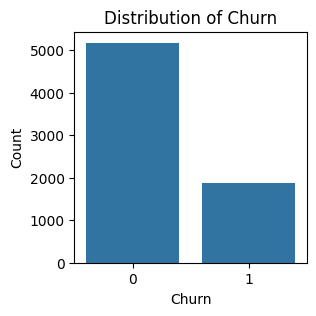

In [11]:
plt.figure(figsize=(3, 3))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

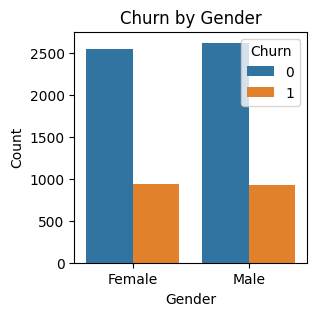

In [12]:
plt.figure(figsize=(3, 3))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

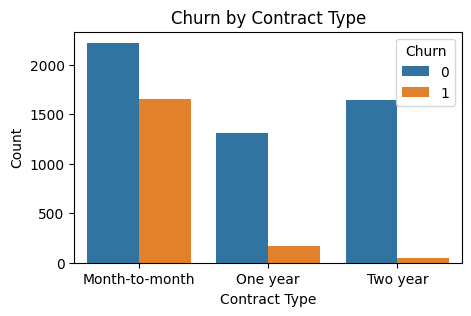

In [15]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

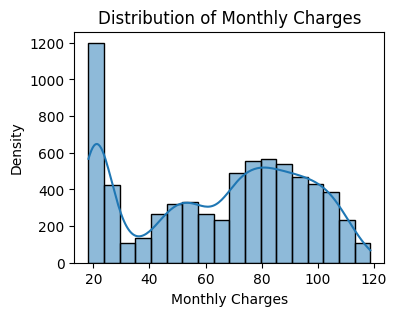

In [16]:
plt.figure(figsize=(4, 3))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

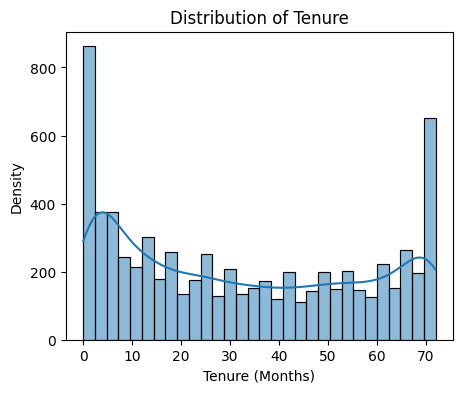

In [17]:
plt.figure(figsize=(5, 4))
sns.histplot(df['tenure'], kde=True, bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.show()

In [18]:
print("Original class distribution:")
print(df['Churn'].value_counts())

Original class distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64


In [19]:
X = df.drop(columns='Churn')
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
print("Train class distribution:")
print(y_train.value_counts())
print("Test class distribution:")
print(y_test.value_counts())


Train class distribution:
Churn
0    4113
1    1521
Name: count, dtype: int64
Test class distribution:
Churn
0    1061
1     348
Name: count, dtype: int64


In [21]:
print("Train class distribution after stratified split:")
print(y_train.value_counts())
print("Test class distribution after stratified split:")
print(y_test.value_counts())

Train class distribution after stratified split:
Churn
0    4113
1    1521
Name: count, dtype: int64
Test class distribution after stratified split:
Churn
0    1061
1     348
Name: count, dtype: int64


In [22]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [23]:
print("Categorical: ",categorical)
print("Numerical: ",numerical)

Categorical:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical:  ['tenure', 'MonthlyCharges', 'TotalCharges']


### **Feature Engineering**

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical])
X_test_scaled = scaler.transform(X_test[numerical])
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical, index=X_test.index)

In [25]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical])
X_test_encoded = encoder.transform(X_test[categorical])
X_train_enc_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical), index=X_train.index)
X_test_enc_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical), index=X_test.index)

In [26]:
X_train_final = pd.concat([X_train_scaled_df, X_train_enc_df], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test_enc_df], axis=1)


In [27]:
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
X_train_res, y_train_res = smote.fit_resample(X_train_final, y_train)

print(f"Original train dataset shape: {y_train.value_counts()}")
print(f"Resampled train dataset shape: {y_train_res.value_counts()}")

Original train dataset shape: Churn
0    4113
1    1521
Name: count, dtype: int64
Resampled train dataset shape: Churn
0    4113
1    4113
Name: count, dtype: int64


In [29]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Model training and evaluation
models = {
    'RandomForest': RandomForestClassifier(random_state=1),
    'ExtraTrees': ExtraTreesClassifier(random_state=1),
    'XGBoost': xgb.XGBClassifier(random_state=1),
    'LightGBM': lgb.LGBMClassifier(random_state=1)
}

for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_final)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)

    print(f'{model_name} Classifier:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(classification_report(y_test, y_pred, zero_division=1))
    print('-' * 60)


RandomForest Classifier:
Accuracy: 0.7864
F1 Score: 0.5860
Precision: 0.5620
Recall: 0.6121
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1061
           1       0.56      0.61      0.59       348

    accuracy                           0.79      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.79      0.79      1409

------------------------------------------------------------
ExtraTrees Classifier:
Accuracy: 0.7615
F1 Score: 0.5200
Precision: 0.5170
Recall: 0.5230
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1061
           1       0.52      0.52      0.52       348

    accuracy                           0.76      1409
   macro avg       0.68      0.68      0.68      1409
weighted avg       0.76      0.76      0.76      1409

------------------------------------------------------------
XGBoost Classifier:
Accuracy: 0.8006
F1 Sc

In [34]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100, 300, 500]
min_samples_split = [2, 5]
min_samples_leaf = [2, 4]
max_features = ['auto', 'sqrt']

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features
}
extra_trees = ExtraTreesClassifier(random_state=1)
random_search = RandomizedSearchCV(extra_trees, hyperparameter_grid, cv=5, n_iter=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=1)
random_search.fit(X_train_res, y_train_res)
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


In [33]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]
param_distributions = {
    'n_estimators': n_estimators,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features
}

extra_trees = ExtraTreesClassifier(random_state=1)
random_search = RandomizedSearchCV(
    estimator=extra_trees,
    param_distributions=param_distributions,
    cv=5,
    n_iter=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=1
)
random_search.fit(X_train_res, y_train_res)
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'auto'}
